In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Abrindo os arquivos
- subistitua o caminho para rodar

In [3]:
df_2018 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2018.csv',  sep=';', encoding='ISO-8859-1')

In [4]:
df_2019 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2019.csv',  sep=';', encoding='ISO-8859-1')

In [5]:
df_2020 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1')

In [6]:
df_2021 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2019.csv',  sep=';', encoding='ISO-8859-1')

In [7]:
df_2022 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2019.csv',  sep=';', encoding='ISO-8859-1')

### Calculo de mulheres inscritas e presentes no Enem de um determinado ano.
- Filtrar mulheres inscritas
- Contar o número de mulheres inscritas
- Filtrar mulheres que participaram da prova no primeiro dia
- Contar o número de mulheres que participaram


In [14]:
def calcular_mulheres_inscritas_presentes(df, coluna_presenca='TP_PRESENCA_CH'):
    
    mulheres_inscritas = df[df['TP_SEXO'] == 'F']
    
    qtd_mulheres_inscritas = mulheres_inscritas.shape[0]
    
    mulheres_presentes = mulheres_inscritas[mulheres_inscritas[coluna_presenca] == 1]
    
    qtd_mulheres_presentes = mulheres_presentes.shape[0]
    
    return qtd_mulheres_inscritas, qtd_mulheres_presentes

## Exibicao de resultados

In [15]:
anos = ['2018', '2019', '2020', '2021', '2022']
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022]

# Listas para armazenar os resultados
inscritas = []
presentes = []

# Calcular para cada ano
for df in dfs:
    qtd_inscritas, qtd_presentes = calcular_mulheres_inscritas_presentes(df)
    inscritas.append(qtd_inscritas)
    presentes.append(qtd_presentes)

# Criar DataFrame para visualização
comparacao_df = pd.DataFrame({
    'Ano': anos,
    'Mulheres Inscritas': inscritas,
    'Mulheres Presentes': presentes
})

print(comparacao_df)

    Ano  Mulheres Inscritas  Mulheres Presentes
0  2018             3257698             2454686
1  2019             3031760             2336370
2  2020             3468805             1663652
3  2021             3031760             2336370
4  2022             3031760             2336370


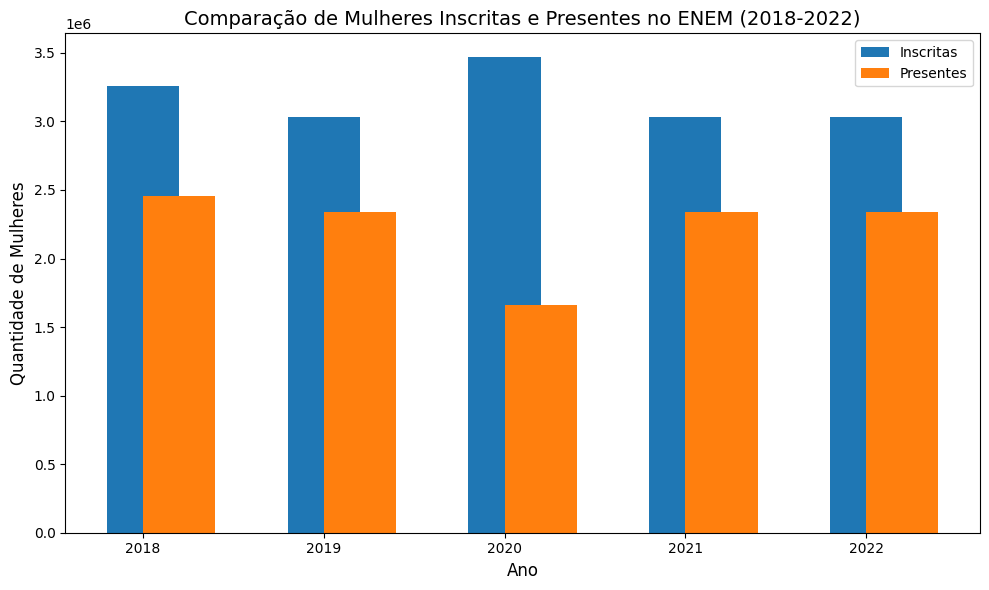

In [16]:
def gerar_grafico_comparacao_mulheres(comparacao_df):
    plt.figure(figsize=(10, 6))

    plt.bar(comparacao_df['Ano'], comparacao_df['Mulheres Inscritas'], width=0.4, label='Inscritas', align='center')

    plt.bar(comparacao_df['Ano'], comparacao_df['Mulheres Presentes'], width=0.4, label='Presentes', align='edge')

    plt.title('Comparação de Mulheres Inscritas e Presentes no ENEM (2018-2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Quantidade de Mulheres', fontsize=12)

    plt.legend()

    plt.tight_layout()
    plt.show()

gerar_grafico_comparacao_mulheres(comparacao_df)

### Calculo Percentual da presenca

In [18]:
def calcular_diferenca_percentual(inscritas, presentes):
    return ((inscritas - presentes) / inscritas) * 100

comparacao_df['Diferença Percentual'] = calcular_diferenca_percentual(
    comparacao_df['Mulheres Inscritas'],
    comparacao_df['Mulheres Presentes']
).round(2)

print(comparacao_df)

    Ano  Mulheres Inscritas  Mulheres Presentes  Diferença Percentual
0  2018             3257698             2454686                 24.65
1  2019             3031760             2336370                 22.94
2  2020             3468805             1663652                 52.04
3  2021             3031760             2336370                 22.94
4  2022             3031760             2336370                 22.94


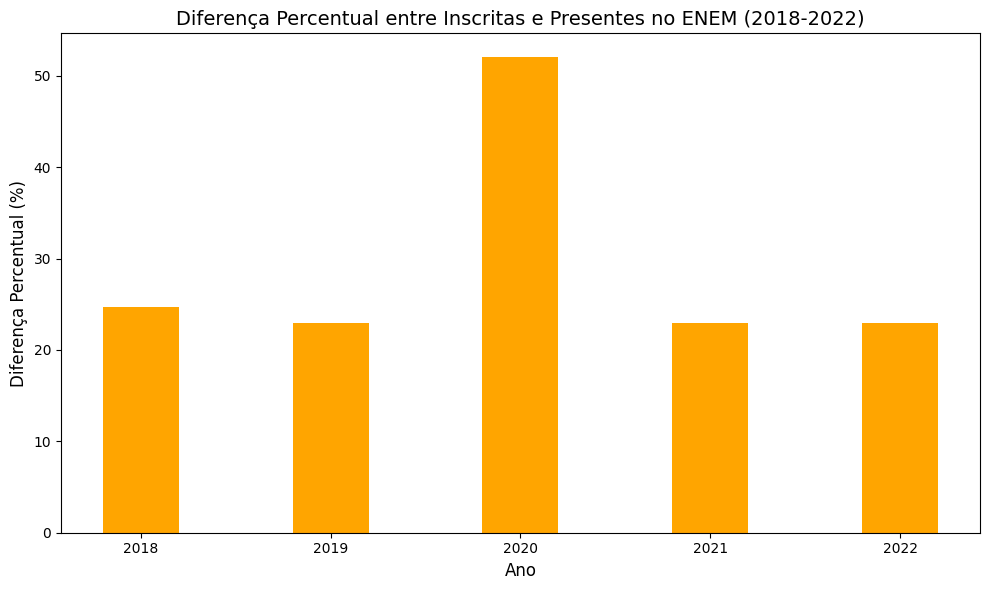

In [13]:
def gerar_grafico_diferenca_percentual(comparacao_df):
    plt.figure(figsize=(10, 6))
    
    plt.bar(comparacao_df['Ano'], comparacao_df['Diferença Percentual'], color='orange', width=0.4)
    
    plt.title('Diferença Percentual entre Inscritas e Presentes no ENEM (2018-2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Diferença Percentual (%)', fontsize=12)

    plt.tight_layout()
    plt.show()

gerar_grafico_diferenca_percentual(comparacao_df)